# 直方图计算，绘制
<https://docs.opencv.org/4.x/d1/db7/tutorial_py_histogram_begins.html>

## 直方图计算

OpenCV 函数比 np.histogram（） 快（大约 40 倍）。所以坚持使用OpenCV功能。

In [8]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('messi.png', cv.IMREAD_GRAYSCALE)

# OpenCV 中的直方图计算
hist = cv.calcHist([img], [0], None, [256], [0, 256])  # 256个bin，范围0-256 [0] 0通道

# Numpy 中的直方图计算
hist, bins = np.histogram(img.ravel(), 256, [0, 256])

## 直方图绘制

### Matplotlib 绘制

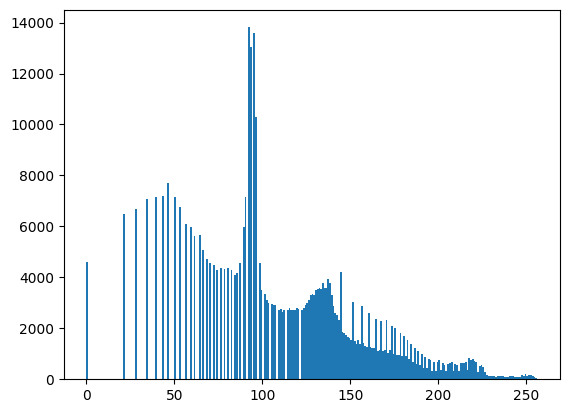

In [9]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('messi.png', cv.IMREAD_GRAYSCALE)

# 使用 Matplotlib 它直接找到直方图并绘制它。您无需使用 calcHist（） 或 np.histogram（） 函数来查找直方图。
plt.hist(img.ravel(), 256, [0, 256])
plt.show()

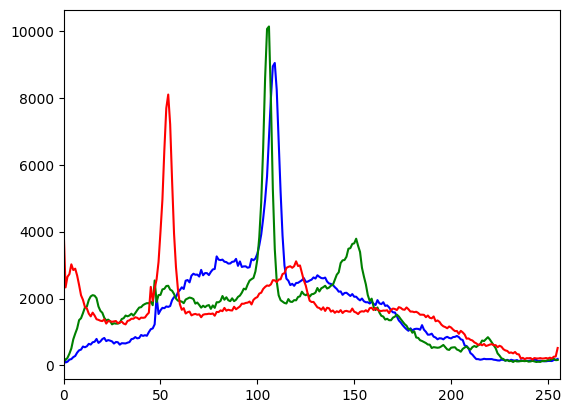

In [13]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('messi.png')
assert img is not None, "file could not be read, check with os.path.exists()"
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    histr = cv.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histr, color=col)
    plt.xlim([0, 256])
plt.show()

## Mask 遮罩

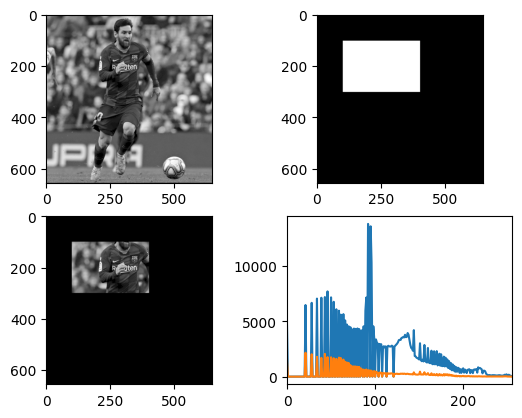

In [14]:
img = cv.imread('messi.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv.calcHist([img],[0],mask,[256],[0,256])
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()